<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

***Описание данных:***

**Признаки:**
 + RowNumber — индекс строки в данных
 + CustomerId — уникальный идентификатор клиента
 + Surname — фамилия
 + CreditScore — кредитный рейтинг
 + Geography — страна проживания
 + Gender — пол
 + Age — возраст
 + Tenure — сколько лет человек является клиентом банка
 + Balance — баланс на счёте
 + NumOfProducts — количество продуктов банка, используемых клиентом
 + HasCrCard — наличие кредитной карты
 + IsActiveMember — активность клиента
 + EstimatedSalary — предполагаемая зарплата
 
**Целевой признак:**
 + Exited — факт ухода клиента

## Подготовка данных

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler 

In [264]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [267]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Tenure — сколько лет человек является клиентом банка, NaN-значения скорее всего у людей, которые пользовались меньше года. Заменим на 0.

In [268]:
df['Tenure'] = df['Tenure'].fillna(0).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [269]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [270]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Посмотрим дубли по уникальному индефикатору клиента.

In [271]:
df['CustomerId'].duplicated().sum()

0

Удалим столбцы, которые помешают обучению модели.

In [272]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Преобразуем категориальные признаки в численные техникой прямого кодирования(OHE).

In [273]:
df = pd.get_dummies(df, drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Разобъем данные на выборки.

In [274]:
features = df.drop('Exited',axis = 1) 
target = df['Exited']

features_train, features_temp, target_train, target_temp  = train_test_split(features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp,target_temp, test_size=0.50, random_state=12345)

print('Размер обучающей выборки:',features_train.shape[0])
print('Размер валидационной выборки:',features_valid.shape[0])
print('Размер тестовой выборки:',features_test.shape[0])

Размер обучающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000


Масштабируем данные методом стандартизации.

In [275]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]  = scaler.transform(features_valid[numeric]) 
features_test[numeric]  = scaler.transform(features_test[numeric]) 
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,8,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2,1.140475,1,0,0,1.524268,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.073677,-0.752805,4,-1.233163,2,0,1,-1.278361,0,0,1
4094,-1.447531,-0.942612,10,-1.233163,2,0,1,-1.281307,0,0,1
3492,0.027113,0.575842,0,-0.310229,1,0,1,-0.903158,0,0,0
2177,0.151731,-1.417129,4,-1.233163,2,0,1,-1.128539,0,0,0


### Вывод:

 - Nan-значения в столбце Tenure заменены 0
 - Удалены не нужные столбцы
 - Дубликатов нет
 - Выборки выделены

## Исследование задачи

Посмотрим на баланс.

In [276]:
df['Exited'].sum()

2037

In [277]:
df['Exited'].mean()

0.2037

Посчитаем метрику f1 на несбалансированной выборке, методом случайного леса.

In [278]:
best_res = 0
best_est = 0
best_depth = 0
for est in range(10,100,10):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth).fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if best_res<result:
            best_res = result
            best_est = est
            best_depth = depth
print('Лучший результат метрики f1: {}, при n_estimators = {}, max_depth = {}'.format(best_res,best_est,best_depth))

Лучший результат метрики f1: 0.5806451612903226, при n_estimators = 60, max_depth = 10


Попробуем CatBoost. Единственный нюанс, в документации рекомедуют не использовать технику прямого кодирования.

In [279]:
model = CatBoostClassifier(learning_rate = 0.05, eval_metric = 'F1', verbose = 200)
model.fit(features_train, target_train, eval_set = (features_valid, target_valid))

0:	learn: 0.4873666	test: 0.4592834	best: 0.4592834 (0)	total: 6.91ms	remaining: 6.9s
200:	learn: 0.6659804	test: 0.5994065	best: 0.6089552 (180)	total: 7.06s	remaining: 28.1s
400:	learn: 0.7358962	test: 0.6102190	best: 0.6102190 (354)	total: 12.9s	remaining: 19.3s
600:	learn: 0.7901115	test: 0.6078148	best: 0.6160584 (443)	total: 18.3s	remaining: 12.2s
800:	learn: 0.8356808	test: 0.6123033	best: 0.6160584 (443)	total: 23.9s	remaining: 5.93s
999:	learn: 0.8748850	test: 0.5968436	best: 0.6160584 (443)	total: 29.5s	remaining: 0us

bestTest = 0.6160583942
bestIteration = 443

Shrink model to first 444 iterations.


Результат лучше, чум у случайного леса. Сразу на тест)

In [280]:
predictions_test = model.predict(features_test)
f1_score(target_test, predictions_test)

0.563049853372434

Глянем ROC-AUC для интереса.

In [281]:
score_catboost = model.predict_proba(features_test)[:,1]
roc_auc_score(target_test, score_catboost)

0.8630715471066798

Досрочно выполнить задание не удалось...придется балансировать)

### Вывод:
**CatBoost отработал лучше, но при таком балансе результат не удовлетворительный.**

## Борьба с дисбалансом

Уже на обученной модели пробуем менять порог

In [282]:
score_catboost_valid = model.predict_proba(features_valid)[:,1]
best_res = 0
best_threshold = 0
for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = score_catboost_valid > threshold 
    f1_valid = f1_score(target_valid, predicted_valid)
    roc_auc_valid = roc_auc_score(target_test, score_catboost_valid)
    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1_valid))
    if f1_valid > best_res:
        best_res = f1_valid
        best_threshold = threshold
print("Лучшие показатели метрики при пороге = {:.2f} | f1 = {:.3f}".format(
        best_threshold, best_res))

Порог = 0.00 | f1 = 0.346
Порог = 0.02 | f1 = 0.393
Порог = 0.04 | f1 = 0.434
Порог = 0.06 | f1 = 0.477
Порог = 0.08 | f1 = 0.512
Порог = 0.10 | f1 = 0.538
Порог = 0.12 | f1 = 0.560
Порог = 0.14 | f1 = 0.570
Порог = 0.16 | f1 = 0.582
Порог = 0.18 | f1 = 0.600
Порог = 0.20 | f1 = 0.603
Порог = 0.22 | f1 = 0.606
Порог = 0.24 | f1 = 0.622
Порог = 0.26 | f1 = 0.626
Порог = 0.28 | f1 = 0.630
Порог = 0.30 | f1 = 0.634
Порог = 0.32 | f1 = 0.630
Порог = 0.34 | f1 = 0.637
Порог = 0.36 | f1 = 0.639
Порог = 0.38 | f1 = 0.632
Порог = 0.40 | f1 = 0.623
Порог = 0.42 | f1 = 0.613
Порог = 0.44 | f1 = 0.607
Порог = 0.46 | f1 = 0.612
Порог = 0.48 | f1 = 0.610
Лучшие показатели метрики при пороге = 0.36 | f1 = 0.639


Теперь снова лес, так же перебором гиперпараметров, но с class_weight='balanced'

In [283]:
best_res = 0
best_est = 0
best_depth = 0
for est in range(10,100,10):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth, 
                                       class_weight='balanced').fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if best_res<result:
            best_res = result
            best_est = est
            best_depth = depth
print('Лучший результат метрики f1: {}, при n_estimators = {}, max_depth = {}'.format(best_res,best_est,best_depth))

Лучший результат метрики f1: 0.6346153846153846, при n_estimators = 70, max_depth = 7


Попробуем увеличить выборку, уменьшать некуда) 80/20 все таки.

In [284]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

best_res = 0
best_repeat = 0

for repeat in range(1,10,1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)
    model = RandomForestClassifier(random_state=12345,n_estimators=70, max_depth = 7) 
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    print("F1:", result)
    if best_res<result:
            best_res = result
            best_repeat = repeat
    
print("Лучшие показатели метрики при {} повторах | f1 = {:.3f}".format(
        best_repeat, best_res))

F1: 0.5466237942122186
F1: 0.6062246278755075
F1: 0.6395348837209303
F1: 0.6174089068825911
F1: 0.5927272727272728
F1: 0.5616883116883117
F1: 0.5381708238851096
F1: 0.5229885057471264
F1: 0.5117565698478562
Лучшие показатели метрики при 3 повторах | f1 = 0.640


**Лучшие результаты получились при снижении порога и при увеличении выборки, округленные - 0.64. Тестировать будем уже на модели,которая обучалась на увеличенной выборке.**

In [285]:
best_res = 0
best_est = 0
best_depth = 0
best_repeat = 0

for repeat in range(1,10,1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)
    for est in range(10,100,10):
        for depth in range(1,11):
            model = RandomForestClassifier(random_state=12345,n_estimators=est, max_depth = depth) 
            model.fit(features_upsampled, target_upsampled)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            if best_res<result:
                best_res = result
                best_repeat = repeat
                best_est = est
                best_depth = depth
                
print("Лучшие показатели метрики при {} повторах | f1 = {:.3f}| est = {}| depth = {}".format(
        best_repeat, best_res, best_est, best_depth))

Лучшие показатели метрики при 3 повторах | f1 = 0.642| est = 90| depth = 6


## Тестирование модели

Обучим модель на лучших гипперпараметрах,которые удалось найти. Выборку так же увеличим.

In [290]:
features_upsampled, target_upsampled = upsample(features_train, target_train, best_repeat)
model = RandomForestClassifier(random_state=12345,n_estimators=best_est, max_depth = best_depth) 
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)


0.6016073478760046

Результат удовлетварительный.

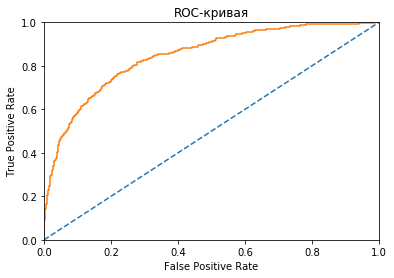

0.8470687528014258

In [287]:
score = model.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(target_test, score) 

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
roc_auc_score(target_test, score)

## Общий вывод
 - Балансировать классы нужно обязательно
 - Добились нужного результа на модели случайного леса, балансировали увеличением выборки. На тестовой выборке F1 - 0.592
 - Метрика ROC-AUC 74, наша модель предсказывает не плохо.

 **PS: ощущение что,чего не хватает...**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*